In [7]:
import pandas as pd
aqi_data = pd.read_csv('AQI and Lat Long of Countries.csv')
print(aqi_data.head())


              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0    

In [8]:
print(aqi_data.info())
print(aqi_data.describe())
print(aqi_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB
None
          AQI Value  CO AQI Value  Ozone

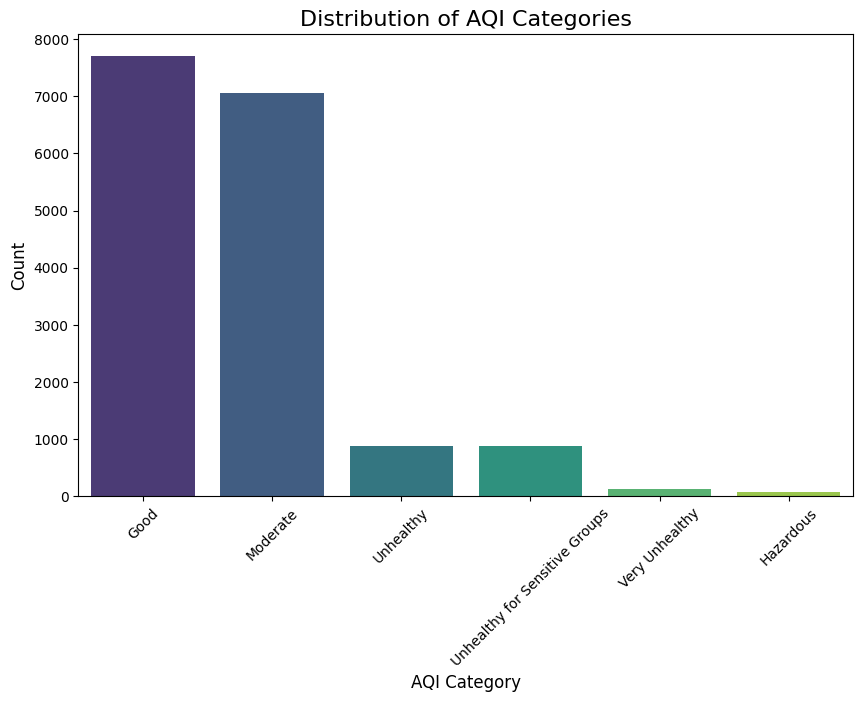

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the AQI category count
aqi_trends_summary = aqi_data['AQI Category'].value_counts()

# Bar chart for AQI category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=aqi_trends_summary.index, y=aqi_trends_summary.values, palette="viridis", hue=aqi_trends_summary.index)
plt.title("Distribution of AQI Categories", fontsize=16)
plt.xlabel("AQI Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
#plt.legend(title='AQI Categories', loc='upper right', frameon=False)  # Disable legend if unnecessary
plt.show()

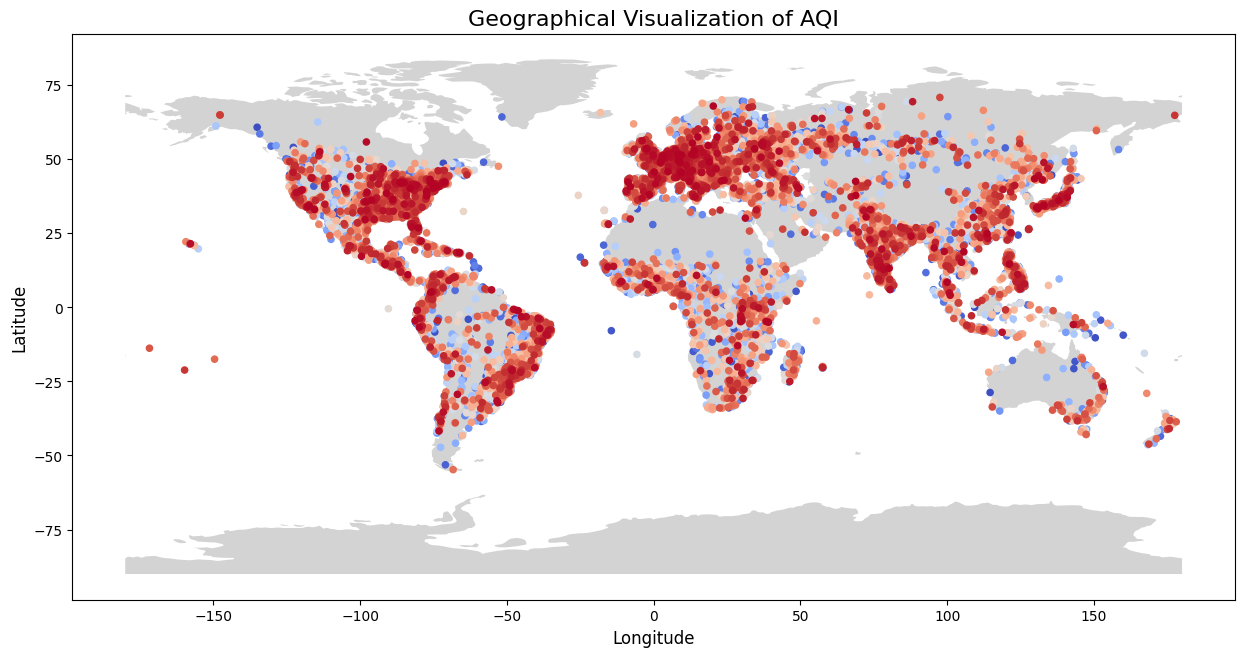

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets

# Load your CSV dataset
aqi_data = pd.read_csv("AQI and Lat Long of Countries.csv")

# Filter out rows with missing latitude or longitude
aqi_data_clean = aqi_data.dropna(subset=['lat', 'lng'])

# Create a GeoDataFrame using lat/lng
gdf = gpd.GeoDataFrame(
    aqi_data_clean,
    geometry=gpd.points_from_xy(aqi_data_clean['lng'], aqi_data_clean['lat']),
    crs="EPSG:4326"
)

# Load world map from geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Plot world map + AQI points
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Plot AQI points
gdf.plot(ax=ax, markersize=20, c=aqi_data_clean['AQI Value'], cmap='coolwarm', legend=True)

plt.title("Geographical Visualization of AQI", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()


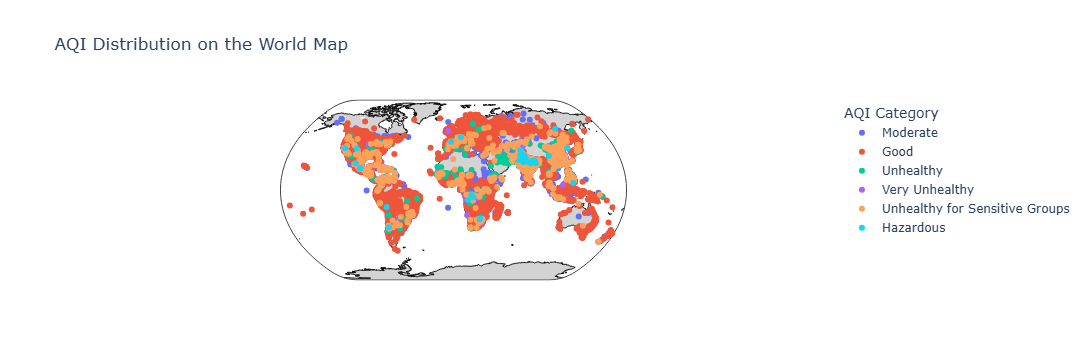

In [15]:
import pandas as pd
import plotly.express as px


# Filter out rows with missing latitude or longitude
aqi_data_clean = aqi_data.dropna(subset=['lat', 'lng'])

# Create an interactive map using Plotly
fig = px.scatter_geo(aqi_data_clean,
                     lat='lat',
                     lon='lng',
                     color='AQI Category',  # Color the points by AQI category
                     hover_name='City',  # Display City name on hover (update with your actual column)
                     hover_data={'AQI Value': True, 'AQI Category': True},
                     color_continuous_scale="Viridis",  # You can choose other color scales
                     title="Geographical Visualization of AQI",
                     projection="natural earth"  # Default map projection
                    )

# Update map layout for better visualization
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_layout(
    geo=dict(
        scope='world',  # You can change to specific regions like 'asia', 'europe', etc.
        projection_scale=1,  # Adjust zoom level (1 is default, increase for zoomed-out view)
    ),
    title="AQI Distribution on the World Map"
)

# Show the interactive map
fig.show()
